In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
from newsvendor import solve_newsvendor_qaoa, comprehensive_analysis, draw_qaoa_circuit, plot_cost_landscape, visualize_circuit_from_result
from newsvendor import visualize_circuit_structure
from scipy.stats import norm
from qulacsvis import circuit_drawer

# 回路の描画

Newsvendor Problem with FSL + QAOA
Problem size: Q_max=5, D_max=5
Qubits: n_q=3, n_d=3, total=10
QAOA depth: p=2, Fourier truncation: M=2
Demand distribution encoded with 5 Fourier modes

Optimizing QAOA parameters...
  Iteration 10: cost = 5.0070
  Iteration 20: cost = 4.9947
  Iteration 30: cost = 5.0019
Optimization completed: 31 function evaluations

RESULTS
Quantum solution: q = 5
Quantum cost: 5.0000
Classical solution: q = 4
Classical cost: 4.2712
Approximation ratio: 1.1706
Measurement confidence: 12.99%
Circuit depth (estimated): 32


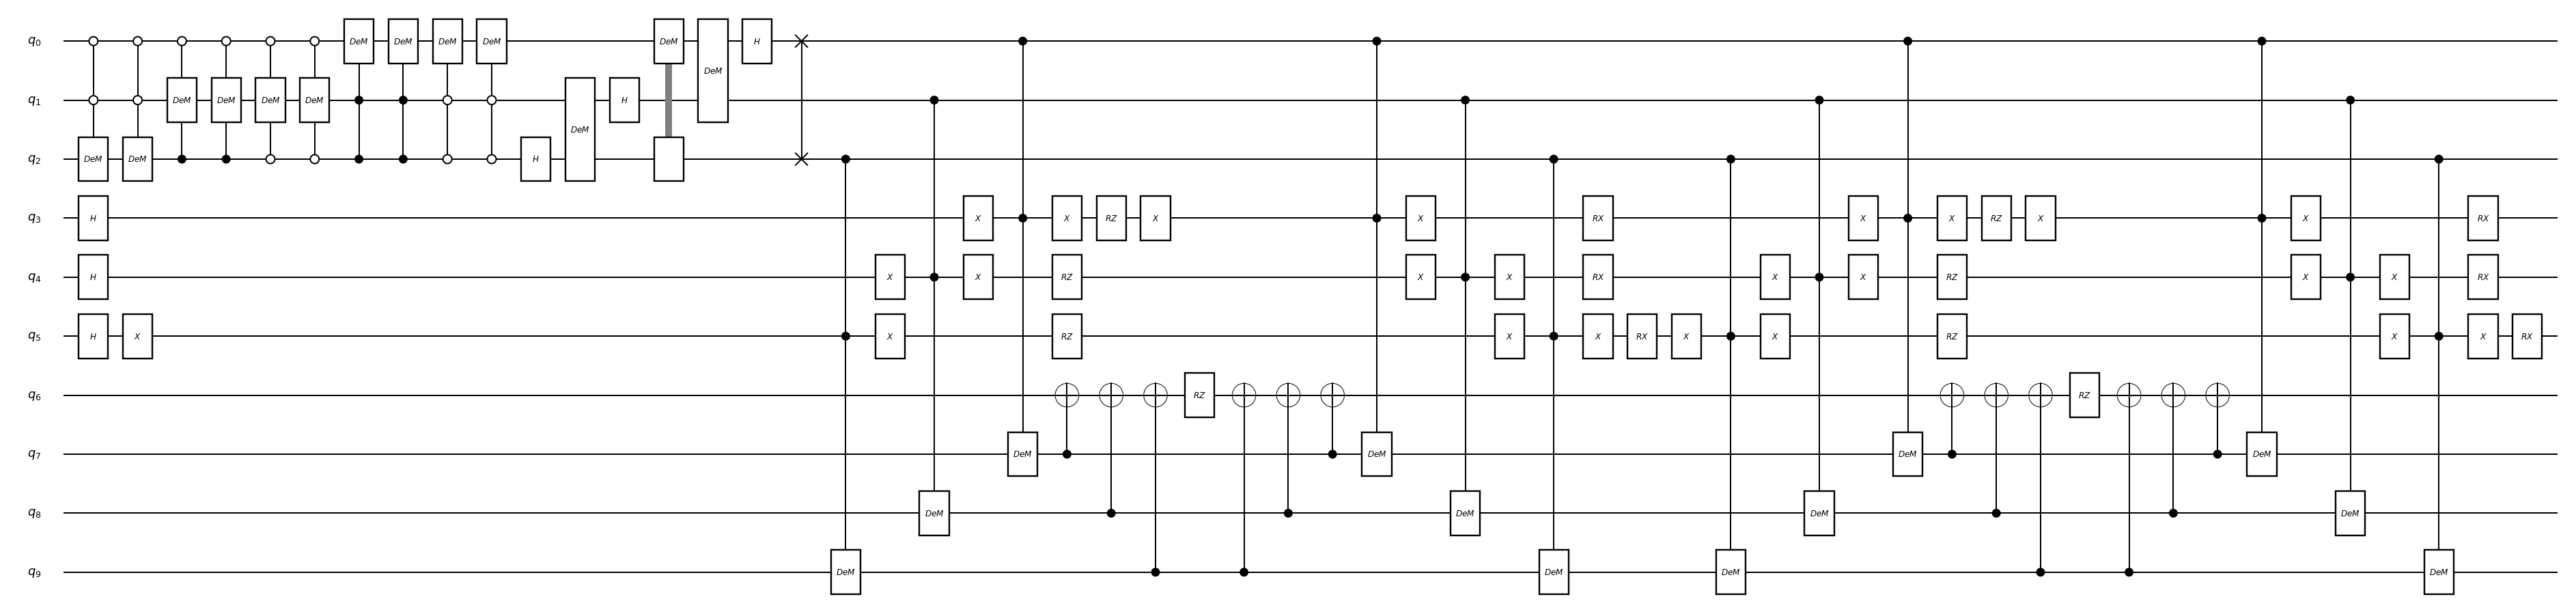

In [47]:
mu, sigma = 3, 1
D_max = 5
Q_max = 5
demand_pdf = lambda x: norm.pdf(x, mu, sigma)
result = solve_newsvendor_qaoa(
    demand_dist=demand_pdf,
    c=1.0,
    lam=5.0,
    Q_max=Q_max,
    D_max=D_max,
    p=2,            # QAOA深さ
    M=2,            # フーリエ打ち切り次数
    n_shots=500,    # 測定回数
    verbose=True
)
# visualize_circuit_structure(result, show_full=True)

circuit_drawer(result['final_circuit'], "mpl")

# 小規模課題

Newsvendor Problem with FSL + QAOA
Problem size: Q_max=5, D_max=5
Qubits: n_q=3, n_d=3, total=10
QAOA depth: p=3, Fourier truncation: M=2
Demand distribution encoded with 5 Fourier modes

Optimizing QAOA parameters...
  Iteration 10: cost = 4.9547
  Iteration 20: cost = 4.9033
  Iteration 30: cost = 4.8860
  Iteration 40: cost = 4.9258
Optimization completed: 47 function evaluations

RESULTS
Quantum solution: q = 3
Quantum cost: 4.4868
Classical solution: q = 4
Classical cost: 4.2712
Approximation ratio: 1.0505
Measurement confidence: 16.60%
Circuit depth (estimated): 44

COMPREHENSIVE QAOA ANALYSIS

1. OPTIMIZATION CONVERGENCE ANALYSIS
----------------------------------------------------------------------

Convergence plot saved to: qaoa_convergence.png


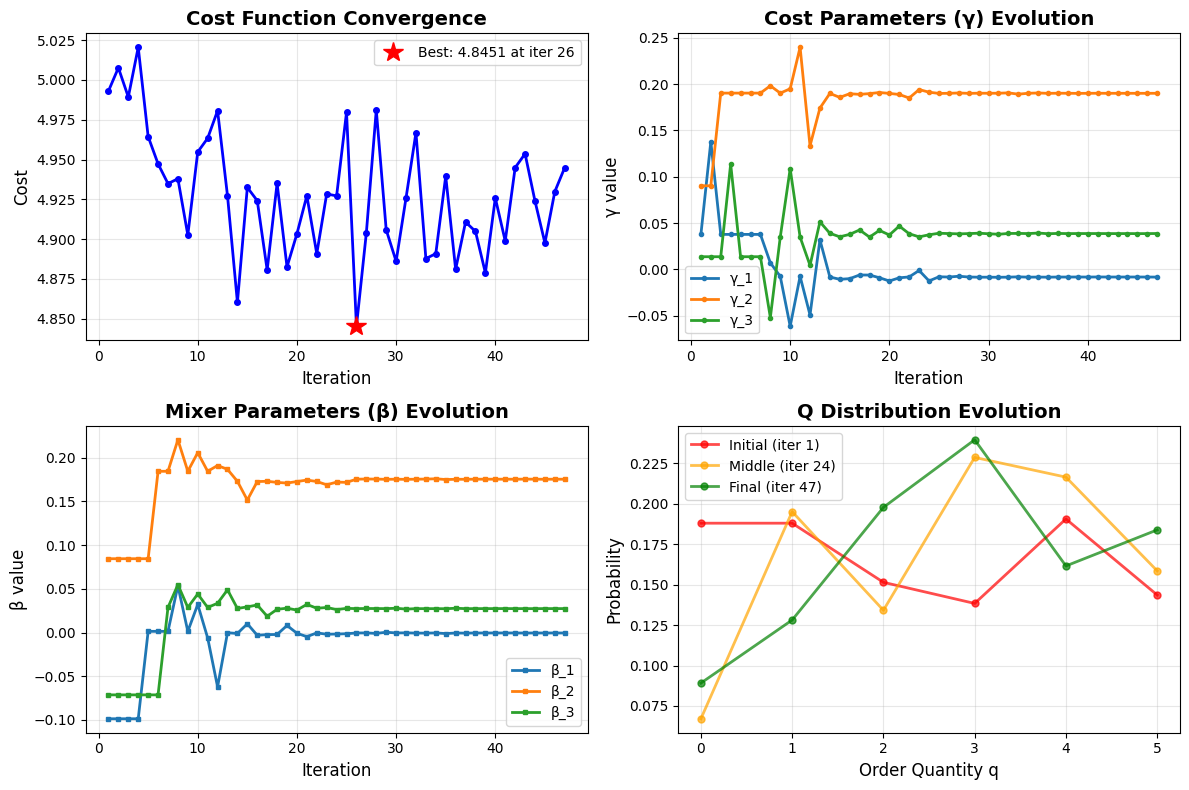


2. CIRCUIT STRUCTURE ANALYSIS
----------------------------------------------------------------------

CIRCUIT STRUCTURE ANALYSIS

Circuit Statistics:
  Total qubits: 10
  Total gates: 113
  Estimated depth: 44
  QAOA layers (p): 3

Register Layout:
  R_d (demand): qubits 0-2 (3 qubits)
  R_q (order quantity): qubits 3-5 (3 qubits)
  R_f (stockout flag): qubit 6
  Ancilla: qubits 7+

Gate Composition:
  ClsOneQubitGate: 42
  QuantumGateMatrix: 31
  ClsOneQubitRotationGate: 21
  ClsOneControlOneTargetGate: 18
  ClsTwoQubitGate: 1

3. FSL ENCODING FIDELITY
----------------------------------------------------------------------

FSL ENCODING FIDELITY ANALYSIS

FSL Circuit Info:
  Number of Fourier modes: 5
  Max mode index (M): 2
  Number of qubits: 3
  Dimension: 8
  Circuit gates: 17 (FSL + IQFT)

Fidelity Metrics:
  Classical Fidelity: 0.923162 (92.3162%)
  Target = 1.0 (100%)
  Total Variation Distance: 0.127672
  Target = 0.0 (perfect match)

FSL fidelity plot saved to: fsl_fidelity.p

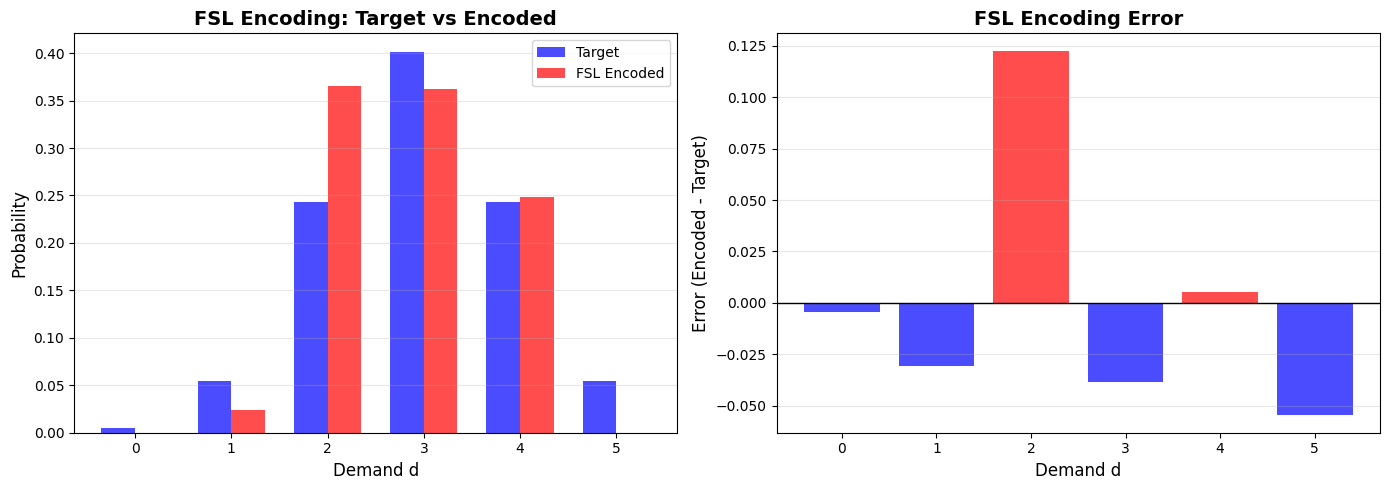


4. FINAL RESULTS
----------------------------------------------------------------------

Visualization saved to: newsvendor_results.png


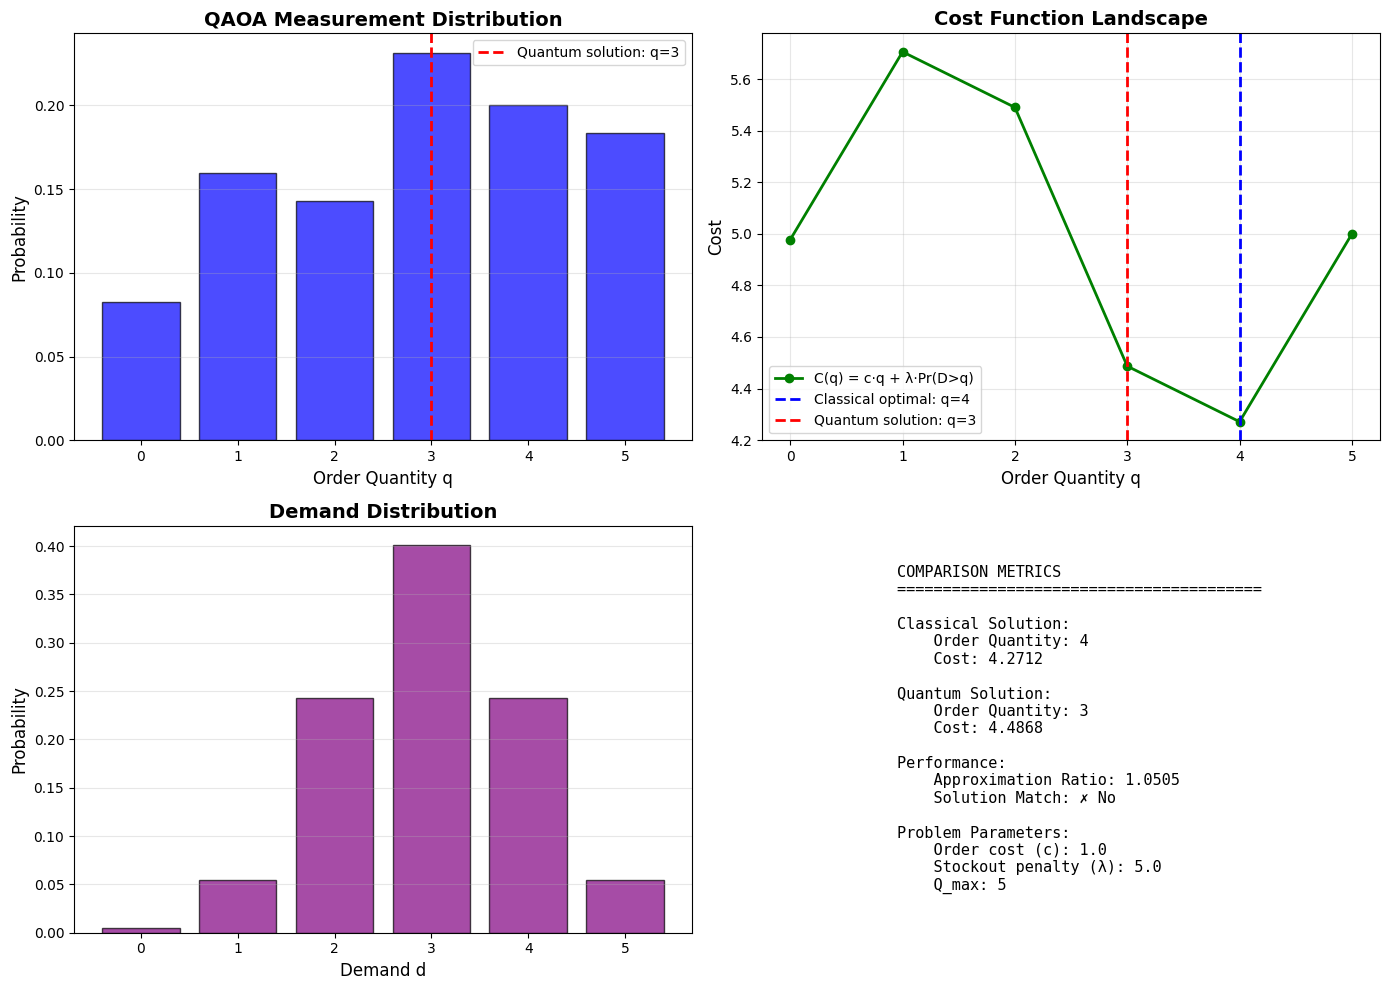


ANALYSIS SUMMARY
Quantum Solution: q = 3
Classical Solution: q = 4
Approximation Ratio: 1.0505
FSL Fidelity: 0.923162
Optimization Iterations: 47
Best Cost Achieved: 4.8451


In [30]:
mu, sigma = 3, 1
D_max = 5
Q_max = 5
demand_pdf = lambda x: norm.pdf(x, mu, sigma)
result = solve_newsvendor_qaoa(
    demand_dist=demand_pdf,
    c=1.0,
    lam=5.0,
    Q_max=Q_max,
    D_max=D_max,
    p=3,            # QAOA深さ
    M=2,            # フーリエ打ち切り次数
    n_shots=500,    # 測定回数
    verbose=True
)
comprehensive_analysis(result)

# 中規模

## landscape


Cost landscape plot saved to: cost_landscape.png


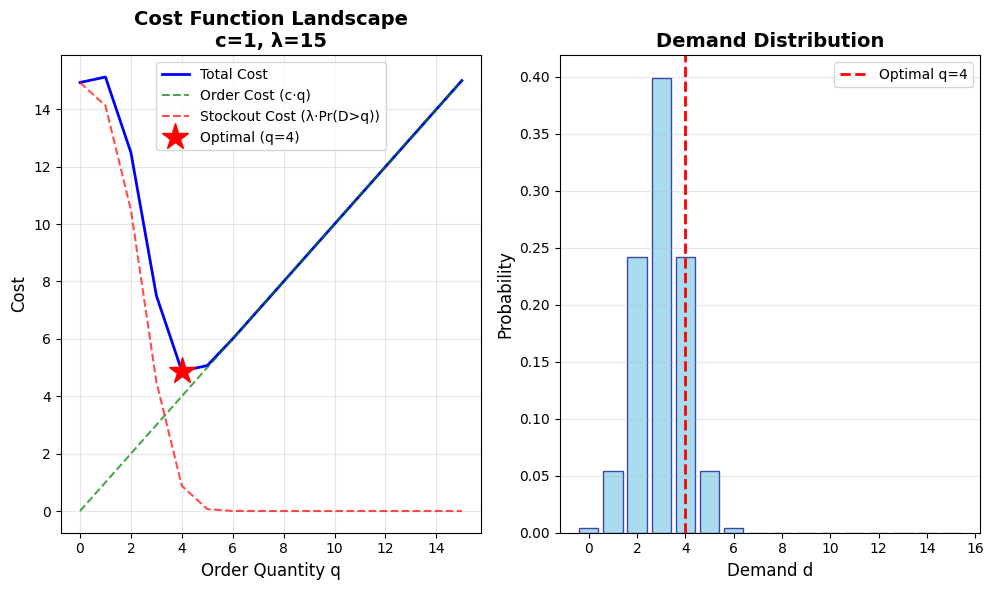


COST FUNCTION ANALYSIS
Parameters: c=1, λ=15
Range: q ∈ [0, 15], d ∈ [0, 15]

Optimal Solution:
  q* = 4
  C(q*) = 4.8785
    Order cost: 4.0000
    Stockout cost: 0.8785

Cost at boundaries:
  C(0) = 14.9335 (all stockout)
  C(15) = 15.0000 (all order)


{'q_values': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 'costs': [np.float64(14.933513276991842),
  np.float64(15.123539175477967),
  np.float64(12.493487097466334),
  np.float64(7.508543022699353),
  np.float64(4.87849094468772),
  np.float64(5.068516843173844),
  np.float64(6.002030120165684),
  np.float64(7.000022395098513),
  np.float64(8.000000091287692),
  np.float64(9.000000000137115),
  np.float64(10.000000000000076),
  np.float64(11.0),
  np.float64(12.0),
  np.float64(13.0),
  np.float64(14.0),
  15],
 'order_costs': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 'stockout_costs': [np.float64(14.933513276991842),
  np.float64(14.123539175477967),
  np.float64(10.493487097466334),
  np.float64(4.508543022699353),
  np.float64(0.8784909446877204),
  np.float64(0.06851684317384422),
  np.float64(0.002030120165684034),
  np.float64(2.2395098513135466e-05),
  np.float64(9.128769219165678e-08),
  np.float64(1.371151597178049e-10),
  np.float64(7.580974546648

In [31]:
mu, sigma = 3, 1
D_max = 15
Q_max = 15
demand_pdf = lambda x: norm.pdf(x, mu, sigma)
plot_cost_landscape(demand_pdf, c=1, lam=15, Q_max=Q_max, D_max=D_max)

### 回路

Newsvendor Problem with FSL + QAOA
Problem size: Q_max=15, D_max=15
Qubits: n_q=4, n_d=4, total=13
QAOA depth: p=1, Fourier truncation: M=3
Demand distribution encoded with 7 Fourier modes

Optimizing QAOA parameters...
  Iteration 10: cost = 10.2385
  Iteration 20: cost = 10.0293
Optimization completed: 23 function evaluations

RESULTS
Quantum solution: q = 2
Quantum cost: 12.4935
Classical solution: q = 4
Classical cost: 4.8785
Approximation ratio: 2.5609
Measurement confidence: 9.71%
Circuit depth (estimated): 32


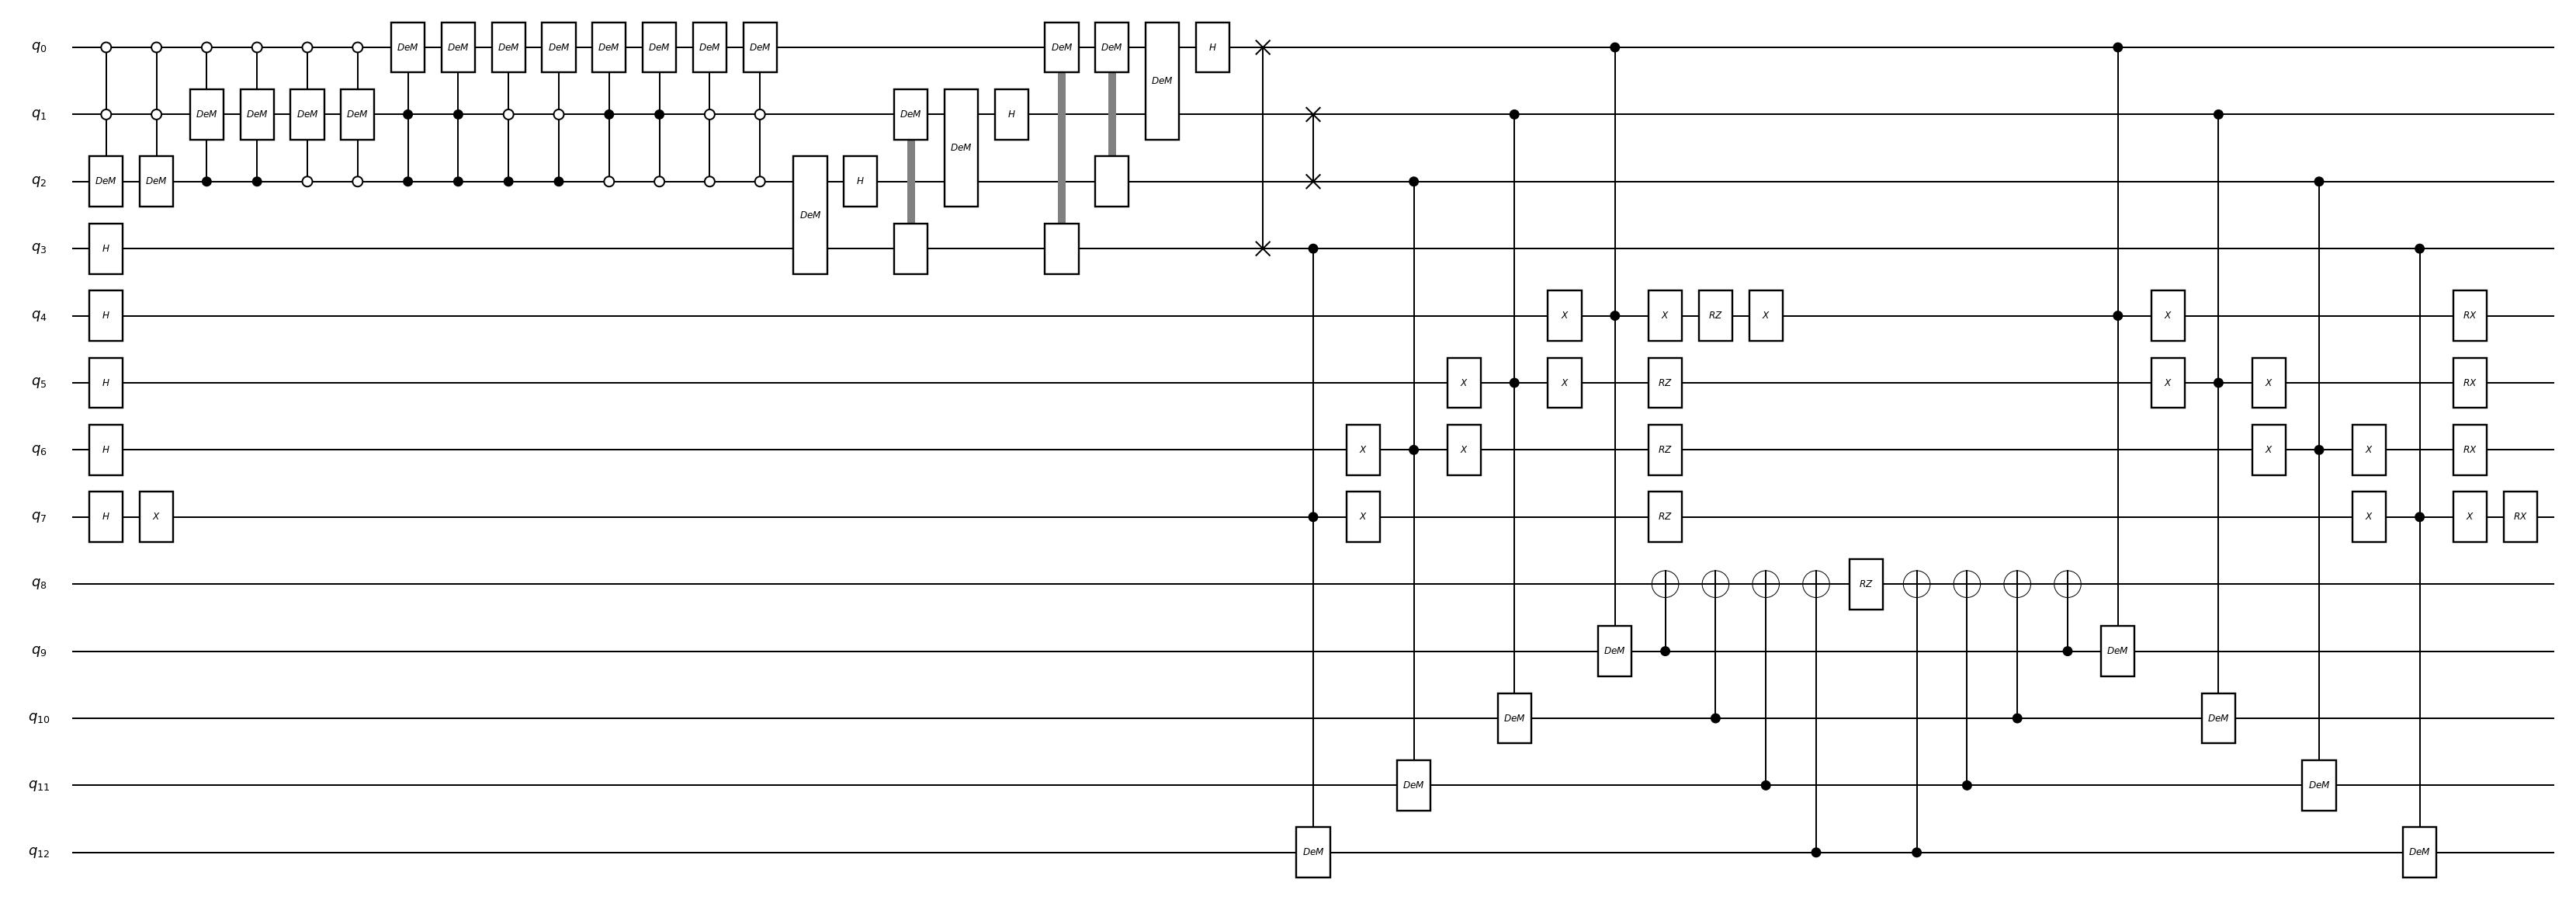

In [57]:
mu, sigma = 3, 1
D_max = 15
Q_max = 15
demand_pdf = lambda x: norm.pdf(x, mu, sigma)
result = solve_newsvendor_qaoa(
    demand_dist=demand_pdf,
    c=1.0,
    lam=15.0,
    Q_max=Q_max,
    D_max=D_max,
    p=1,            # QAOA深さ
    M=3,            # フーリエ打ち切り次数
    n_shots=500,    # 測定回数
    verbose=True
)
# comprehensive_analysis(result)

circuit_drawer(result['final_circuit'], "mpl")